In [1]:
import os
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
from pypesto import profile, store
from pypesto.store import read_from_hdf5
from scipy.stats import norm
from scipy.stats import t as t_dist
from inference.helper_functions import compute_error_estimate
from inference.inference_functions import create_boundaries_from_prior
from inference.nlme_objective import ObjectiveFunctionNLME, get_covariance
from inference.ploting_routines import corrplot

/Users/jonas.arruda/miniconda/envs/Amortized-NLME/lib/python3.10/site-packages/bayesflow/trainers.py:27: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import matplotlib
matplotlib.rcdefaults()  # for resetting to defaults

In [3]:
plt.rcParams.update({'font.size': 20,
                     'text.usetex': True,
                     "font.family": "serif",
                     "font.serif": ["Computer Modern Roman"],
                     'axes.titlesize': 'small',
                     'axes.labelsize': 'small',
                     'xtick.labelsize': 'small',
                     'ytick.labelsize': 'small',
                     'legend.fontsize': 'small',
                     #'figure.dpi': 600,
                     'figure.figsize': (16,9)}) #
colors = ['#1f78b4', '#a6cee3', '#b2df8a','#33a02c','#fb9a99']

In [4]:
# load models
from models.froehlich_model_simple import FroehlichModelSimple, batch_simulator as simulator_simple
simple_model = FroehlichModelSimple(load_best=True)
_ = simple_model.build_trainer('../networks/' +  simple_model.network_name)

from models.froehlich_model_detailed import FroehlichModelDetailed, batch_simulator as simulator_detailed
detailed_model = FroehlichModelDetailed(load_best=True)
_ = detailed_model.build_trainer('../networks/' +  detailed_model.network_name)

from models.froehlich_model_sde import FroehlichModelSDE, batch_simulator as simulator_sde
sde_model = FroehlichModelSDE(load_best=True)
_ = sde_model.build_trainer('../networks/' +  sde_model.network_name)

from models.pharmacokinetic_model import PharmacokineticModel

pharma_model = PharmacokineticModel(load_best=True)
_ = pharma_model.build_trainer('../networks/' +  pharma_model.network_name)

INFO:root:Performing 2 pilot runs with the SimpleFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 6)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.


using 2 layers of MultiConv1D, a bidirectional LSTM with 256 units and a dense layer with output dimension 12 as summary network
using a 6-layer cINN as inference network with 2 layers of design spline
prior mean: [-3. -3.  5.  0.  0. -1.]
prior covariance diagonal: [ 5.  5. 11.  2.  6.  2.]
Using the model SimpleFroehlichModel


INFO:root:Loaded loss history from ../networks/amortizer-simple-fro-sequence-summary-Bi-LSTM-6layers-2coupling-spline-500epochs/history_416.pkl.
INFO:root:Networks loaded from ../networks/amortizer-simple-fro-sequence-summary-Bi-LSTM-6layers-2coupling-spline-500epochs/ckpt-416
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network (Invert  multiple                  450420    
 ibleNetwork)                                                    
                                                                 
 sequence_network (Sequence  multiple                  605484    
 Network)                                                        
                                                                 
Total params: 1055904 (4.03 MB)
Trainable params: 1055832 (4.03 MB)
Non-trainable params: 72 (288.00 Byte)
_________________________________________________________________
None


  Activating project at `~/PyCharm Projects/Amortized-NLME/models/SimulatorFroehlich`


using 2 layers of MultiConv1D, a bidirectional LSTM with 256 units and a dense layer with output dimension 22 as summary network
using a 7-layer cINN as inference network with 2 layers of design spline
prior mean: [-1. -1. -1. 12. -1.  1. -1. -6.  0.  0. -1.]
prior covariance diagonal: [5. 5. 2. 1. 2. 2. 2. 5. 2. 5. 2.]
Using the model DetailedFroehlichModel


INFO:root:Performing 2 pilot runs with the DetailedFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 11)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../networks/amortizer-detailed-fro-sequence-summary-Bi-LSTM-7layers-2coupling-spline-500epochs/history_335.pkl.
INFO:root:Networks loaded from ../networks/amortizer-detailed-fro-sequence-summary-Bi-LSTM-7layers-2coupling-spline-500epochs/ckpt-335
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network_1 (Inve  multiple                  769265    
 rtibleNetwork)                                                  
                                                                 
 sequence_network_1 (Sequen  multiple                  610614    
 ceNetwork)                                                      
                                                                 
Total params: 1379879 (5.26 MB)
Trainable params: 1379725 (5.26 MB)
Non-trainable params: 154 (616.00 Byte)
_________________________________________________________________
None
using 2 layers of MultiConv1D, a  LSTM with 256 units and a dense layer with output dimension 16 as summary network
using a 7-layer cINN as inference network with 3 layers of design spline
prior mean: [-3. -3. -1.  5.  0.  0.  0. -1.]
prior covariance diagonal: 

INFO:root:Performing 2 pilot runs with the SDEFroehlichModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 8)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 180, 1)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../networks/amortizer-sde-fro-sequence-summary-LSTM-7layers-3coupling-spline-500epochs/history_417.pkl.
INFO:root:Networks loaded from ../networks/amortizer-sde-fro-sequence-summary-LSTM-7layers-3coupling-spline-500epochs/ckpt-417
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network_2 (Inve  multiple                  854168    
 rtibleNetwork)                                                  
                                                                 
 sequence_network_2 (Sequen  multiple                  307504    
 ceNetwork)                                                      
                                                                 
Total params: 1161672 (4.43 MB)
Trainable params: 1161560 (4.43 MB)
Non-trainable params: 112 (448.00 Byte)
_________________________________________________________________


  Activating project at `~/PyCharm Projects/Amortized-NLME/models/SimulatorPharma`


None
using a split network with 2 splits, in each 2 layers of MultiConv1D, a bidirectional LSTM with 256 units and a dense layer with output dimension 22 as summary network
using a 8-layer cINN as inference network with 2 layers of design spline
prior mean: [-5.   6.5  2.5  2.5  6.5  0.   6.5 -3.  -1.  -1.   0. ]
prior covariance diagonal: [4.5 1.  1.  1.  1.  1.  1.  4.5 2.  2.  1. ]
Using the PharmacokineticModel


INFO:root:Performing 2 pilot runs with the PharmacokineticModel model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 11)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 20, 4)
INFO:root:No optional prior non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:Loaded loss history from ../networks/amortizer-pharma-split-sequence-summary-Bi-LSTM-8layers-2coupling-spline-500epochs/history_584.pkl.
INFO:root:Networks loaded from ../networks/amortizer-pharma-split-sequence-summary-Bi-LSTM-8layers-2coupling-spline-500epochs/ckpt-584
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


Model: "amortized_posterior_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 invertible_network_3 (Inve  multiple                  924216    
 rtibleNetwork)                                                  
                                                                 
 split_network (SplitNetwor  multiple                  1221804   
 k)                                                              
                                                                 
Total params: 2146020 (8.19 MB)
Trainable params: 2145844 (8.19 MB)
Non-trainable params: 176 (704.00 Byte)
_________________________________________________________________
None


In [5]:
# load synthetic data for specific model
single_real_data = simple_model.load_data(load_egfp=True, load_d2egfp=False)
n_bayesflow_samples = 1000

np.random.seed(42)
random_index = np.random.randint(0, single_real_data[0].shape[0])

# simulate data from different posterior samples for a real cell
real_single_cell = single_real_data[random_index][np.newaxis, :]
param_samples_real =  simple_model.draw_posterior_samples(data=real_single_cell, n_samples=n_bayesflow_samples)
real_sim = simulator_simple(param_samples_real)
real_median = np.median(real_sim, axis=0)
real_perc = np.percentile(real_sim.reshape(n_bayesflow_samples, 180), (2.75, 97.5), axis=0)

real_single_cell2 = single_real_data[single_real_data.shape[0]-random_index][np.newaxis, :]
param_samples_real2 = simple_model.draw_posterior_samples(data=real_single_cell2, n_samples=n_bayesflow_samples)
real_sim2 = simulator_simple(param_samples_real2)
real_median2 = np.median(real_sim2, axis=0)
real_perc2 = np.percentile(real_sim2.reshape(n_bayesflow_samples, 180), (2.75, 97.5), axis=0)

# simulated data
t_points = np.linspace(start=1 / 6, stop=30, num=180, endpoint=True)

In [6]:
# Scalability & Error Analysis
test_n_cells = [50, 100, 500, 5000, 10000]
compute_relative_error = False  # relative to true parameter values
epsilon = 1e-4

# load results
n_samples_opt_list = [10, 50, 100, 250]
n_runs = 100
simple_model_time_opt = np.ones((len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
simple_model_amortized_error = np.ones((len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
simple_model_amortized_var = np.ones((len(test_n_cells), len(n_samples_opt_list))) * np.nan
    
for nc, n_cells in enumerate(test_n_cells):
    for ns, n_samples in enumerate(n_samples_opt_list):
        # load results
        filename = f'synthetic_results_amortized/{simple_model.name}_cells_{n_cells}_samples_{n_samples}.hd5'
        result_optimization = store.read_result(filename)
        results_params = np.array(result_optimization.optimize_result.x)
                
        # load true population parameters
        true_pop_parameters = simple_model.load_synthetic_parameter(n_data=n_cells)
        # set very small variances to 0.001
        true_pop_parameters[simple_model.n_params:][true_pop_parameters[simple_model.n_params:] < 0.001] = 0.001
        
        estimated_params_full = []
        for i_r, res in enumerate(results_params):
            # transform results
            estimated_beta = res[:simple_model.n_params]
            estimated_var = np.exp(-res[simple_model.n_params:simple_model.n_params*2])
            estimated_params = np.concatenate((estimated_beta, estimated_var))
                         
            # compute relative error of parameter estimated as minimum over multi_starts
            simple_model_amortized_error[nc, ns, i_r] = compute_error_estimate(estimated_params,
                                                            true_pop_parameters,
                                                            bi_modal=True if 'Simple' in simple_model.name else False,
                                                            relative_error=compute_relative_error)
            estimated_params_full.append(estimated_params)
            
        simple_model_amortized_var[nc, ns] = np.var(simple_model_amortized_error[nc, ns])
             
        # get duration of optimization procedure (in seconds)
        simple_model_time_opt[nc, ns] = np.array(result_optimization.optimize_result.time) / 60 / 60

detailed_model_time_opt = np.ones((len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
detailed_model_amortized_error = np.ones((len(test_n_cells), len(n_samples_opt_list), n_runs)) * np.nan
detailed_model_amortized_var = np.ones((len(test_n_cells), len(n_samples_opt_list))) * np.nan
for nc, n_cells in enumerate(test_n_cells):
    for ns, n_samples in enumerate(n_samples_opt_list):
        # load results
        filename = f'synthetic_results_amortized/{detailed_model.name}_cells_{n_cells}_samples_{n_samples}.hd5'
        result_optimization = store.read_result(filename)
        results_params = np.array(result_optimization.optimize_result.x)
                
        # load true population parameters
        true_pop_parameters = detailed_model.load_synthetic_parameter(n_data=n_cells)
        # set very small variances to 0.001
        true_pop_parameters[detailed_model.n_params:][true_pop_parameters[detailed_model.n_params:] < 0.001] = 0.001
        
        estimated_params_full = []
        for i_r, res in enumerate(results_params):
            # transform results
            estimated_beta = res[:detailed_model.n_params]
            estimated_var = np.exp(-res[detailed_model.n_params:detailed_model.n_params*2])
            estimated_params = np.concatenate((estimated_beta, estimated_var))
                         
            # compute relative error of parameter estimated as minimum over multi_starts
            detailed_model_amortized_error[nc, ns, i_r] = compute_error_estimate(estimated_params,
                                                            true_pop_parameters,
                                                            relative_error=compute_relative_error)
            estimated_params_full.append(estimated_params)
            
        detailed_model_amortized_var[nc, ns] = np.var(detailed_model_amortized_error[nc, ns])
             
        # get duration of optimization procedure (in seconds)
        detailed_model_time_opt[nc, ns] = np.array(result_optimization.optimize_result.time) / 60 / 60


# read results from monolix
simple_model_monolix_errors = np.ones(len(test_n_cells)) * np.nan
simple_model_monolix_var = np.ones(len(test_n_cells)) * np.nan
simple_model_timing_monolix = np.ones(len(test_n_cells)) * np.nan
simple_model_timing_monolix_std = np.ones(len(test_n_cells)) * np.nan

reorder_monolix_params = [0,1,2,3,4,10,5,6,7,8,9]
for cell_idx, n_cells in enumerate(test_n_cells):    
    estimates_monolix = pd.read_csv(f'synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_cells}_poppars.csv',
                                    index_col=0, header=0)
    
    true_pop_parameters = simple_model.load_synthetic_parameter(n_data=n_cells)
    # set very small variances to 0.001
    true_pop_parameters[simple_model.n_params:][true_pop_parameters[simple_model.n_params:] < 0.001] = 0.001

    results_to_compare = []
    for col in estimates_monolix.columns:
        temp_res = estimates_monolix[col].values[reorder_monolix_params]
        # standard deviation is not on log-scale
        temp_res[simple_model.n_params-1] = np.log(temp_res[simple_model.n_params-1])
        temp_res = np.concatenate((temp_res, [0.001]))  # add variance of noise
        results_to_compare.append(temp_res)
    error_mono = compute_error_estimate(np.array(results_to_compare), 
                                        true_pop_parameters, 
                                        bi_modal=True,
                                        relative_error=compute_relative_error)
    # take min over multi-starts
    error_mono.sort()
    simple_model_monolix_errors[cell_idx] = np.nanmedian(error_mono)
    simple_model_monolix_var[cell_idx] = np.nanvar(error_mono)

    # results are sorted
    if os.path.exists(f'synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_cells}_likelihoods.csv'):
        best_runs = pd.read_csv(f'synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_cells}_likelihoods.csv', 
                                    index_col=0, header=0)['run']#[:10]
    else:
        # likelihood were not always available
        best_runs = pd.read_csv(f'synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_cells}_complete_likelihoods.csv', 
                                index_col=0, header=0)['run']#[:10]
    
    # get timing        
    timing_monolix_df = pd.read_csv(f'synthetic_results_monolix/fröhlich-simple/optimization_times/synthetic_{n_cells}_timings.csv', 
                                 header=0)
    simple_model_timing_monolix[cell_idx] = np.nanmedian(timing_monolix_df.saem / 60 / 60)  # in hours
    simple_model_timing_monolix_std[cell_idx] = np.nanstd(timing_monolix_df.saem / 60 / 60)  # in hours
    
    
detailed_model_monolix_errors = np.ones(len(test_n_cells)) * np.nan
detailed_model_monolix_var = np.ones(len(test_n_cells)) * np.nan
detailed_model_timing_monolix = np.ones(len(test_n_cells)) * np.nan
detailed_model_timing_monolix_std = np.ones(len(test_n_cells)) * np.nan

reorder_monolix_params = [1,2,3,7,6,5,19,4,20,8,0,9,10,11,15,14,13,17,12,18,16]
for cell_idx, n_cells in enumerate(test_n_cells):    
    estimates_monolix = pd.read_csv(f'synthetic_results_monolix/fröhlich-detailed/estimates/synthetic_{n_cells}_poppars.csv',
                                    index_col=0, header=0)
    
    true_pop_parameters = detailed_model.load_synthetic_parameter(n_data=n_cells)
    # set very small variances to 0.001
    true_pop_parameters[detailed_model.n_params:][true_pop_parameters[detailed_model.n_params:] < 0.001] = 0.001

    results_to_compare = []
    for row_id, row in estimates_monolix.iterrows():
        temp_res = row.values[reorder_monolix_params]
        # standard deviation is not on log-scale
        temp_res[detailed_model.n_params-1] = np.log(np.abs(temp_res[detailed_model.n_params-1]))
        temp_res = np.concatenate((temp_res, [0.001]))  # add variance of noise
        results_to_compare.append(temp_res)

    error_mono = compute_error_estimate(np.array(results_to_compare), 
                                        true_pop_parameters, 
                                        relative_error=compute_relative_error)
    # take min over multi-starts
    error_mono.sort()
    detailed_model_monolix_errors[cell_idx] = np.nanmedian(error_mono)
    detailed_model_monolix_var[cell_idx] = np.nanvar(error_mono)

    # results are sorted
    if os.path.exists(f'synthetic_results_monolix/fröhlich-detailed/estimates/synthetic_{n_cells}_likelihoods.csv'):
        best_runs = pd.read_csv(f'synthetic_results_monolix/fröhlich-detailed/estimates/synthetic_{n_cells}_likelihoods.csv', 
                                    index_col=0, header=0)['run']#[:10]
    else:
        # likelihood were not always available
        best_runs = pd.read_csv(f'synthetic_results_monolix/fröhlich-detailed/estimates/synthetic_{n_cells}_complete_likelihoods.csv', 
                                index_col=0, header=0)['run']#[:10]
    
    # get timing
    timing_monolix_df = pd.read_csv(f'synthetic_results_monolix/fröhlich-detailed/optimization_times/synthetic_{n_cells}_timings.csv', 
                                 header=0)
    detailed_model_timing_monolix[cell_idx] = np.nanmedian(timing_monolix_df.saem / 60 / 60)  # in hours
    detailed_model_timing_monolix_std[cell_idx] = np.nanstd(timing_monolix_df.saem / 60 / 60)  # in hours

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_10.hd5.
Loading the sampling result failed. It is highly likely that no sampling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_10.hd5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within synthetic_results_amortized/SimpleFroehlichModel_cells_50_samples_50.hd5.
Loading the sampling result failed. It is highly likely that no samp

In [7]:
result_simple = read_from_hdf5.read_result('../Experiments/multi-experiment/fröhlich-simple_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_simple.problem.x_names) if 'd2eGFP' not in name]
result_simple = result_simple.optimize_result.as_dataframe()['x'][0][param_idx_egfp]
estimated_beta_simple = result_simple[:6]
estimated_psi_simple = get_covariance(result_simple[6:], covariance_format='diag', param_dim=6)

result_detailed = read_from_hdf5.read_result('../Experiments/multi-experiment/fröhlich-detailed_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_detailed.problem.x_names) if 'd2eGFP' not in name]
result_detailed = result_detailed.optimize_result.as_dataframe()['x'][0][param_idx_egfp]
estimated_beta_detailed = result_detailed[:11]
estimated_psi_detailed = get_covariance(result_detailed[11:], covariance_format='diag', param_dim=11)

result_sde = read_from_hdf5.read_result('../Experiments/multi-experiment/fröhlich-sde_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_sde.problem.x_names) if 'd2eGFP' not in name]
result_sde = result_sde.optimize_result.as_dataframe()['x'][0][param_idx_egfp]
estimated_beta_sde = result_sde[:8]
estimated_psi_sde = get_covariance(result_sde[8:], covariance_format='diag', param_dim=8)

mat_simple = scipy.io.loadmat('../data/froehlich_eGFP/code/S=[5,6]_transfection_norm.mat')
param_estimates_simple = mat_simple['parameters_MEM'][0,0][6][0][0][4]
likelihood_simple = mat_simple['parameters_MEM'][0,0][6][0][0][2]
best_id_small = np.nanargmax(likelihood_simple)
estimated_beta_fro = param_estimates_simple[:6, best_id_small][[0,1,3,4,5,5]]
var_simple = np.exp(param_estimates_simple[6:, best_id_small])[[0,1,3,4,5,5]]
estimated_psi_fro = np.diag(var_simple)

np.random.seed(42)
# sample from log normal distribution
n_trajectories = len(single_real_data)
reproduced_param_simple = np.random.multivariate_normal(estimated_beta_simple,
                                                     estimated_psi_simple,
                                                     size=n_trajectories)
reproduced_param_detailed = np.random.multivariate_normal(estimated_beta_detailed,
                                                        estimated_psi_detailed,
                                                        size=n_trajectories)
reproduced_param_sde = np.random.multivariate_normal(estimated_beta_sde,
                                                        estimated_psi_sde,
                                                        size=n_trajectories)
reproduced_param_fro = np.random.multivariate_normal(estimated_beta_fro,
                                                        estimated_psi_fro,
                                                        size=n_trajectories)

reproduced_data_simple = simulator_simple(reproduced_param_simple)
reproduced_data_detailed = simulator_detailed(reproduced_param_detailed)
reproduced_data_sde = simulator_sde(reproduced_param_sde)

median_sim_simple = simulator_simple(estimated_beta_simple, with_noise=False)
median_sim_detailed = simulator_detailed(estimated_beta_detailed, with_noise=False)
median_sim_sde = simulator_sde(np.repeat(estimated_beta_sde[np.newaxis], 100, axis=0), with_noise=False)

reproduced_data_fro = simulator_simple(reproduced_param_fro, with_noise=False, exp_func='power10')

real_mean = np.mean(single_real_data, axis=0)

simple_mean = np.mean(reproduced_data_simple, axis=0)
dif_simple = simple_mean - real_mean
std_simple = np.std(reproduced_data_simple, axis=0)
detailed_mean = np.mean(reproduced_data_detailed, axis=0)
dif_detailed = detailed_mean - real_mean
std_detailed = np.std(reproduced_data_detailed, axis=0)
sde_mean = np.mean(reproduced_data_sde, axis=0)
dif_sde = sde_mean - real_mean
std_sde = np.std(reproduced_data_sde, axis=0)
dif_fro = np.mean(reproduced_data_fro, axis=0) - real_mean
std_fro = np.std(reproduced_data_fro, axis=0)

t_value_05 = abs(t_dist.ppf(0.05 / reproduced_data_simple.shape[1], df=reproduced_data_simple.shape[0] - 1))

confidence_band_upper_05_simple = dif_simple + t_value_05 * std_simple / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_lower_05_simple = dif_simple - t_value_05 * std_simple / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_upper_05_detailed = dif_detailed + t_value_05 * std_detailed / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_lower_05_detailed = dif_detailed - t_value_05 * std_detailed / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_upper_05_sde = dif_sde + t_value_05 * std_sde / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_lower_05_sde = dif_sde - t_value_05 * std_sde / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_upper_05_fro = dif_fro + t_value_05 * std_fro / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_lower_05_fro = dif_fro - t_value_05 * std_fro / np.sqrt(reproduced_data_simple.shape[0])

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/multi-experiment/fröhlich-simple_diag.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/multi-experiment/fröhlich-simple_diag.hdf5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/multi-experiment/fröhlich-detailed_diag.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/mu

## Result Figure 1

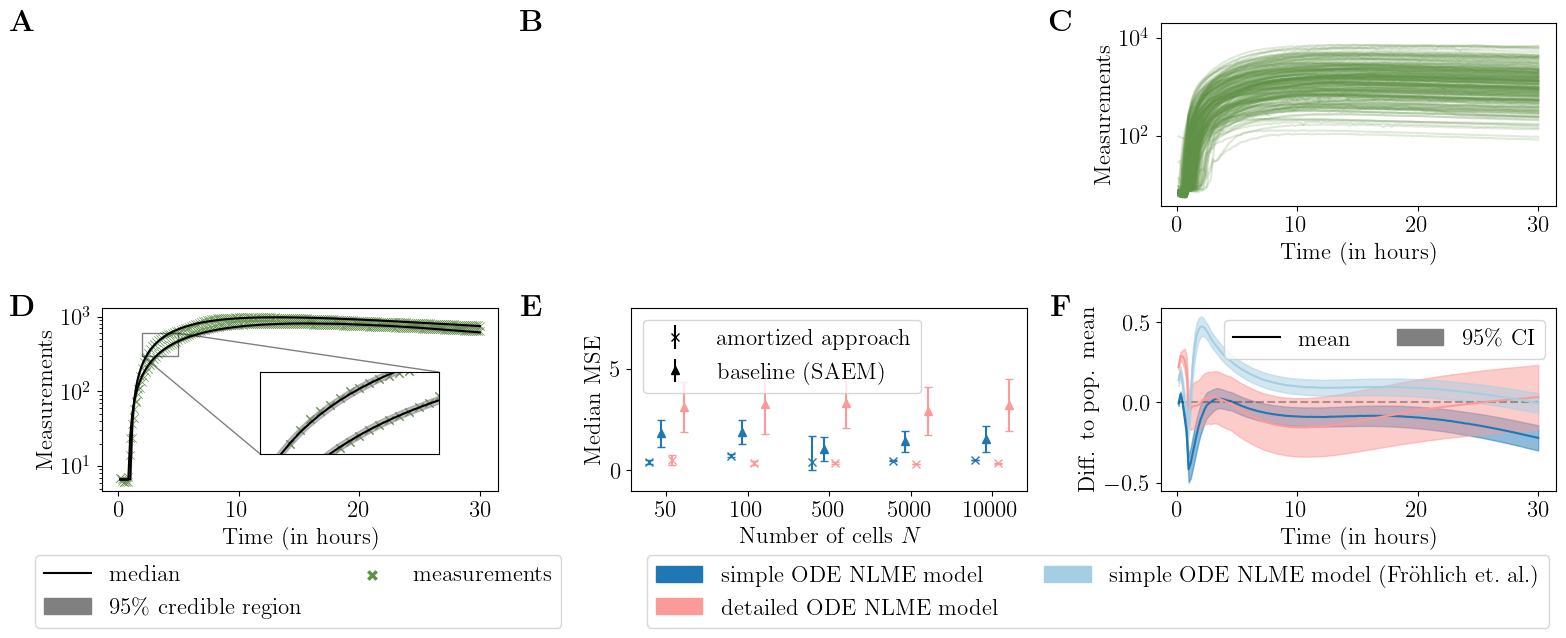

In [8]:
fig_total, ax_total = plt.subplots(nrows=2, ncols=3, figsize=(16, 6), gridspec_kw={'height_ratios': [1, 1]},
                                   layout="tight")
ax0, ax1_0, ax1, ax2, ax4, ax3 = ax_total.flatten()

cell_color = '#609146'  # '#3FC834'

##################### Data & Models
#ax0.set_title('Single-Cell Translation Kinetics ')
#ax1_0.set_title('State Variables of ODE Models')
ax0.axis('off')
ax1_0.axis('off')

#ax1.set_title('Single-Cell Fluorescence Intensities')
for i, cell in enumerate(single_real_data[:200]):
    ax1.plot(t_points, np.exp(cell.flatten()), color=cell_color, alpha=0.2)
ax1.set_xlabel('Time (in hours)')
ax1.set_ylabel('Measurements')
ax1.set_yscale('log')
ax1.set_xlabel('Time (in hours)')
ax1.set_yscale('log')
ax1.set_ylim(ax1.get_ylim()[0], 2e4)

###################### Posterior Simulation
ax2.scatter(t_points, np.exp(real_single_cell2.flatten()), c=cell_color, marker='x', linewidth=0.5)
ax2.scatter(t_points, np.exp(real_single_cell.flatten()), c=cell_color, marker='x', linewidth=0.5)
ax2.fill_between(t_points, np.exp(real_perc2[0, :]), np.exp(real_perc2[1, :]), 
                 color='grey', alpha=0.5, label=f'95\% credible region')
region = ax2.fill_between(t_points, np.exp(real_perc[0, :]), np.exp(real_perc[1, :]), 
                          color='grey', alpha=0.5, label=f'95\% credible region')
median, = ax2.plot(t_points, np.exp(real_median), color='black', label=f'posterior median')
ax2.plot(t_points, np.exp(real_median2), color='black')
ax2.set_xlabel('Time (in hours)')
ax2.set_ylabel('Measurements')
ax2.set_yscale('log')
#ax2.set_title('Posterior Fit to Single Cell')
real_patch = ax2.scatter([],[], marker='x',  c=cell_color, linewidth=2.5, label='measurements')

# plot zoom in
zax = ax2.inset_axes([0.4, 0.2, 0.45, 0.45])
zax.scatter(t_points, np.exp(real_single_cell2.flatten()), c=cell_color, marker='x', linewidth=1)
zax.scatter(t_points, np.exp(real_single_cell.flatten()), c=cell_color, marker='x', linewidth=1)
zax.fill_between(t_points, np.exp(real_perc2[0, :]), np.exp(real_perc2[1, :]), color='grey', alpha=0.5, label=f'95\% credible region')
zax.fill_between(t_points, np.exp(real_perc[0, :]), np.exp(real_perc[1, :]), color='grey', alpha=0.5, label=f'95\% credible region')
zax.plot(t_points, np.exp(real_median), color='black', label=f'posterior median')
zax.plot(t_points, np.exp(real_median2), color='black')
zax.set_yscale('log')
zax.set_xlim(2,5)
zax.set_ylim(3e2,6e2)
zax.set_xticks([])
zax.set_yticks([], minor=True)
zax.set_yticks([])
ax2.indicate_inset_zoom(zax, edgecolor="black")

###################### population fit (small, large, fröhlich) compared to Fröhlich
# plot real synthetic data vs estimated data
t_points = np.linspace(start=1 / 6, stop=30, num=real_single_cell.shape[1], endpoint=True)

ax3.fill_between(t_points, confidence_band_upper_05_simple.flatten(), confidence_band_lower_05_simple.flatten(),
                         color=colors[0], alpha=0.5, label='95\% confidence band')
ax3.plot(t_points, dif_simple, color=colors[0], label='estimation difference')
ax3.plot(t_points, np.zeros(t_points.size), color='black', linestyle='--', alpha=0.3)

ax3.fill_between(t_points, confidence_band_upper_05_detailed.flatten(), confidence_band_lower_05_detailed.flatten(),
                         color=colors[4], alpha=0.5, label='95\% confidence band')
ax3.plot(t_points, dif_detailed, color=colors[4], label='estimation difference')

ax3.fill_between(t_points, confidence_band_upper_05_fro.flatten(), confidence_band_lower_05_fro.flatten(),
                         color=colors[1], alpha=0.5, label='95\% confidence band')
ax3.plot(t_points, dif_fro, color=colors[1], label='estimation difference')

#ax3.set_title('Fit to Population Mean')
ax3.set_ylabel('Diff. to pop. mean')
small_patch = mpatches.Patch(color=colors[0], label='simple ODE NLME model')
large_patch = mpatches.Patch(color=colors[4], label='detailed ODE NLME model')
ref_patch = mpatches.Patch(color=colors[1], label='simple ODE NLME model (Fröhlich et.\ al.)')
ax3.set_xlabel('Time (in hours)')

######################  Error on Synthetic Data
for j, n_samples_opt in enumerate([10, 50, 100, 250]):
    if n_samples_opt != 100: continue
    ax4.errorbar(x=np.arange(len(test_n_cells))-0.21, 
                 y=np.median(simple_model_amortized_error[:, j], axis=1), 
                 yerr=np.stack([np.minimum(np.sqrt(simple_model_amortized_var[:, j]), 
                                                    np.median(simple_model_amortized_error[:, j], axis=1)), 
                                         np.sqrt(simple_model_amortized_var[:, j])]),
                 alpha=1, color=colors[0],
                  linestyle='None', marker='x', capsize=3,
                                                )
ax4.errorbar(x=np.arange(len(test_n_cells))-0.07, 
                          y=simple_model_monolix_errors, 
                          yerr=np.stack([np.minimum(np.sqrt(simple_model_monolix_var), 
                                                    simple_model_monolix_errors), 
                                         np.sqrt(simple_model_monolix_var)]),
              color=colors[0], linestyle='None', marker='^', capsize=3)
    
for j, n_samples_opt in enumerate([10, 50, 100, 250]):
    if n_samples_opt != 100: continue
    ax4.errorbar(x=np.arange(len(test_n_cells))+0.07,
                 y=np.median(detailed_model_amortized_error[:, j], axis=1), 
                 yerr=np.stack([np.minimum(np.sqrt(detailed_model_amortized_var[:, j]), 
                                                    np.median(detailed_model_amortized_error[:, j], axis=1)), 
                                         np.sqrt(detailed_model_amortized_var[:, j])]),
                 alpha=1, color=colors[4],
                  linestyle='None', marker='x', capsize=3,
                 )
    
ax4.errorbar(x=np.arange(len(test_n_cells))+0.21, 
                          y=detailed_model_monolix_errors, 
                          yerr=np.stack([np.minimum(np.sqrt(detailed_model_monolix_var), 
                                                    detailed_model_monolix_errors), 
                                         np.sqrt(detailed_model_monolix_var)]),
             color=colors[4], linestyle='None', marker='^', capsize=3)

ax4.set_ylabel('Median MSE')
ax4.set_xlabel('Number of cells $N$')
#ax4.set_title('Parameter Recovery Error')
ax4.set_xticks(ticks=np.arange(len(test_n_cells)), labels=np.array(test_n_cells))

ax4.errorbar([], [], [], color='black', linestyle='None', marker='x', capsize=3, label='amortized approach')
ax4.errorbar([], [], [], color='black', linestyle='None', marker='^', capsize=3, label='baseline (SAEM)')
ax4.legend(loc='upper left')
ax4.set_ylim(-1, 8)

#### Legend
median, = ax2.plot([],[],  color='black', label='median')
mean, = ax4.plot([],[],  color='black', label='mean')
credible = mpatches.Patch(color='grey', label='95\% credible region')
confidence = mpatches.Patch(color='grey', label='95\% CI')
lgd1 = fig_total.legend(handles=[median, credible, real_patch],
            loc='lower center', ncol=2, bbox_to_anchor=(0.195, -0.1))
lgd3 = ax3.legend(handles=[mean, confidence],
            loc='upper right', ncol=2)
lgd = fig_total.legend(handles=[small_patch, large_patch, ref_patch],
            loc='lower center', ncol=2, bbox_to_anchor=(0.695, -0.1))

ax0.text(-0.2, 1, '\\bf{A}', horizontalalignment='center', verticalalignment='center',
         transform=ax0.transAxes, fontsize=22)
ax1.text(-0.25, 1, '\\bf{C}', horizontalalignment='center', verticalalignment='center',
         transform=ax1.transAxes, fontsize=22)
ax1_0.text(-0.25, 1, '\\bf{B}', horizontalalignment='center', verticalalignment='center',
           transform=ax1_0.transAxes, fontsize=22)
ax2.text(-0.2, 1, '\\bf{D}', horizontalalignment='center', verticalalignment='center',
         transform=ax2.transAxes, fontsize=22)
ax3.text(-0.25, 1, '\\bf{F}', horizontalalignment='center', verticalalignment='center',
         transform=ax3.transAxes, fontsize=22)
ax4.text(-0.25, 1, '\\bf{E}', horizontalalignment='center', verticalalignment='center',
         transform=ax4.transAxes, fontsize=22)

#plt.savefig('../plots/paper/results_plot.svg', format='svg', bbox_inches='tight', pad_inches=0.3,
#           bbox_extra_artists=(lgd1,))
plt.show()

 #### Result Figure 2

In [9]:
param_names = simple_model.param_names.copy()
#param_names[2] = 'scale'
pop_param_names = ['median-' + name for name in param_names]
var_param_names = ['var-' + name for name in param_names]
param_names_plot = param_names + param_names

n_data = 500
true_sample_params = simple_model.load_synthetic_parameter(n_data=n_data)
result_simple = read_from_hdf5.read_result(
    f'../Experiments/synthetic_results_amortized/uncertainty_{simple_model.name}_cells_{n_data}_samples_{100}.hd5')
n_opt_param = simple_model.n_params * 2

# load monolix results
monolix_likelihood = pd.read_csv(
    f'../Experiments/synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_data}_likelihoods.csv',
                                 index_col=0,
                                 header=0)
monolix_rse_df = pd.read_csv(
    f'../Experiments/synthetic_results_monolix/fröhlich-simple/relative_standard_errors/rses_{n_data}.csv', header=0)
monolix_param_df = pd.read_csv(
    f'../Experiments/synthetic_results_monolix/fröhlich-simple/estimates/synthetic_{n_data}_poppars.csv',
                               index_col=0, header=0)
# compute confidence intervals and save them
profile_list = result_simple.profile_result.list[0]
profile_indices = [ix for ix, res in enumerate(profile_list) if res]

intervals = []
for i_par in range(result_simple.problem.dim_full):
    if i_par not in profile_indices:
        continue
    xs = profile_list[i_par].x_path[i_par]
    ratios = profile_list[i_par].ratio_path
    lb_01, ub_01 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.99)
    )
    lb_05, ub_05 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.95)
    )
    lb_2, ub_2 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.80)
    )
    if i_par < simple_model.n_params:
        intervals.append((lb_2, lb_05, lb_01, ub_01, ub_05, ub_2))
    else:
        intervals.append((np.exp(-ub_2), np.exp(-ub_05), np.exp(-ub_01), np.exp(-lb_01), np.exp(-lb_05), np.exp(-lb_2)))
intervals = np.array(intervals)

# other mode
intervals = intervals[[1, 0, 2, 3, 4, 5, 7, 6, 8, 9, 10]]

# prepare monolix results
n_runs = len(monolix_likelihood["run"])
monolix_intervals = np.zeros((n_runs, 11, 6))
monolix_median = []
for r_idx, monolix_run in enumerate(monolix_likelihood["run"]):
    # get relative standard error
    monolix_rse = monolix_rse_df[f'run_{monolix_likelihood["run"][r_idx]}']
    monolix_rse = monolix_rse[monolix_rse.index[[0, 1, 2, 3, 4, 10, 5, 6, 7, 8, 9]]]
    # get estimated parameters
    monolix_param = monolix_param_df[f'run_{monolix_likelihood["run"][r_idx]}']
    # reorder parameters as in the model
    monolix_param = monolix_param[monolix_param.index[[0, 1, 2, 3, 4, 10, 5, 6, 7, 8, 9]]]
    # we need standard errors, (relative standard error = se divided by the estimated parameter value * 100 [%] )
    monolix_se = monolix_param.values * (monolix_rse.values / 100)
    # calculate confidence intervals
    monolix_ub_01 = monolix_param.values + 2.576 * monolix_se
    monolix_ub_05 = monolix_param.values + 1.96 * monolix_se
    monolix_ub_2 = monolix_param.values + 1.282 * monolix_se
    monolix_ub_01[5] = np.log(monolix_ub_01[5])  # sigma population value is not log-transformed in monolix
    monolix_ub_05[5] = np.log(monolix_ub_05[5])
    monolix_ub_2[5] = np.log(monolix_ub_2[5])
    monolix_lb_01 = monolix_param.values - 2.576 * monolix_se
    monolix_lb_05 = monolix_param.values - 1.96 * monolix_se
    monolix_lb_2 = monolix_param.values - 1.282 * monolix_se
    monolix_lb_01[5] = np.log(
        monolix_lb_01[5])  # if ~np.isnan(np.log(monolix_lb[5])) else -100 #-np.Inf #np.log(monolix_lb[5])
    monolix_lb_05[5] = np.log(monolix_lb_05[5])
    monolix_lb_2[5] = np.log(monolix_lb_2[5])
    # save confidence intervals
    monolix_intervals[r_idx] = np.array([monolix_lb_2, monolix_lb_05, monolix_lb_01,
                                         monolix_ub_01, monolix_ub_05, monolix_ub_2]).T
    monolix_median.append(monolix_param.values)
monolix_median = np.array(monolix_median)[:1]
monolix_median[:, 5] = np.log(monolix_median[:, 5])
monolix_median = np.median(monolix_median, axis=0)

# plot population medians instead of log-means
monolix_intervals = monolix_intervals[:, [1, 0, 2, 3, 4, 5, 7, 6, 8, 9, 10]]
monolix_median = monolix_median[[1, 0, 2, 3, 4, 5, 7, 6, 8, 9, 10]]
transformed_monolix_intervals = np.concatenate((np.exp(monolix_intervals[:, :simple_model.n_params]),
                                                monolix_intervals[:, simple_model.n_params:]), axis=1)
transformed_monolix_median = np.concatenate((np.exp(monolix_median[:simple_model.n_params]),
                                             monolix_median[simple_model.n_params:]))
transformed_intervals = np.concatenate((np.exp(intervals[:simple_model.n_params]),
                                                intervals[simple_model.n_params:]))
transformed_true_params = np.concatenate((np.exp(true_sample_params[:simple_model.n_params]),
                                          true_sample_params[simple_model.n_params:]))


# analyse coverage of monolix
coverage_perc = np.zeros(n_opt_param - 1)
for run_idx in range(n_runs):
    monolix_lb = transformed_monolix_intervals[run_idx, :, 1]
    monolix_ub = transformed_monolix_intervals[run_idx, :, 4]
    for p_idx, (ci_l, ci_u) in enumerate(zip(monolix_lb, monolix_ub)):
        if ci_l <= transformed_true_params[p_idx] <= ci_u:
            coverage_perc[p_idx] += 1
coverage_perc /= n_runs
print('Monolix')
print(pd.DataFrame(np.array([param_names_plot[:-1], (coverage_perc * 100).round(2)]).T,
                   columns=['Parameter', 'Coverage [%]']))

coverage_perc = np.zeros(n_opt_param - 1)
amortized_lb = transformed_intervals[:, 1]
amortized_ub = transformed_intervals[:, 4]
for p_idx, (ci_l, ci_u) in enumerate(zip(amortized_lb, amortized_ub)):
    if ci_l <= transformed_true_params[p_idx] <= ci_u:
        coverage_perc[p_idx] += 1
print('Amortized')
print(pd.DataFrame(np.array([param_names_plot[:-1], (coverage_perc * 100).round(2)]).T,
                   columns=['Parameter', 'Coverage [%]']))


def plot_intervals(median, cis,
                   ax=None, alpha_median=0.3,
                   par_names: list = None,
                   levels: list = [0.05, 0.95],
                   offset: float = 0,
                   color: str = None):
    for i_par, par in enumerate(par_names):
        for i_c, confidence in reversed(list(enumerate(levels))):
            ax.hlines(i_par + offset,
                      cis[i_par, i_c],
                      cis[i_par, -1 - i_c],
                      linewidth=8 / len(levels) * (len(levels) - i_c),
                      alpha=1 / len(levels) * (len(levels) - i_c),
                      color=color)
            ax.vlines(median[i_par], offset + i_par - 0.15, offset + i_par + 0.15, color="black", 
                      alpha=alpha_median)
    xmin, xmax = ax.get_xlim()
    for i_par, par in enumerate(par_names[:-1]):
        ax.hlines(i_par + 0.5, xmin, xmax, color="black", linewidth=1, linestyle="dashed", alpha=0.1)

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/synthetic_results_amortized/uncertainty_SimpleFroehlichModel_cells_500_samples_100.hd5.


Monolix
        Parameter Coverage [%]
0        $\delta$         1.42
1        $\gamma$         2.23
2   $k m_0$-scale        92.31
3           $t_0$        100.0
4          offset        100.0
5        $\sigma$        71.46
6        $\delta$          0.2
7        $\gamma$          0.0
8   $k m_0$-scale          0.0
9           $t_0$          0.0
10         offset         4.05
Amortized
        Parameter Coverage [%]
0        $\delta$        100.0
1        $\gamma$          0.0
2   $k m_0$-scale        100.0
3           $t_0$        100.0
4          offset        100.0
5        $\sigma$        100.0
6        $\delta$        100.0
7        $\gamma$          0.0
8   $k m_0$-scale        100.0
9           $t_0$        100.0
10         offset          0.0


In [10]:
lower_bound, upper_bound = create_boundaries_from_prior(
        prior_mean=simple_model.prior_mean,
        prior_std=simple_model.prior_std,
        boundary_width_from_prior=2.58,  # 99% of the prior mass is within 2.58 standard deviations
        covariance_format='diag',
        prior_type='normal'
)

In [11]:
result_real_simple = read_from_hdf5.read_result(f'../Experiments/real_data/fröhlich-simple_cholesky.hdf5')
result_real_sde = read_from_hdf5.read_result(f'../Experiments/real_data/fröhlich-sde_cholesky.hdf5')

result_real_simple = result_real_simple.optimize_result.x[0]
obj_fun_amortized = ObjectiveFunctionNLME(model_name=simple_model.name, prior_mean=simple_model.prior_mean,
                                          prior_std=simple_model.prior_std,
                                          covariance_format='cholesky')

estimated_beta, psi_inverse, _, _ = obj_fun_amortized.get_params(result_real_simple)
estimated_psi = np.linalg.inv(psi_inverse)
estimated_var = estimated_psi.diagonal()
estimated_corr = estimated_psi[np.tril_indices(obj_fun_amortized.param_dim, k=-1)]
result_real_simple = np.concatenate((estimated_beta, estimated_var, estimated_corr))

# switch to other mode
results_simple_new = result_real_simple.copy()
results_simple_new[0] = result_real_simple[1]
results_simple_new[1] = result_real_simple[0]
results_simple_new[6] = result_real_simple[7]
results_simple_new[7] = result_real_simple[6]
result_real_simple = results_simple_new

result_real_sde = result_real_sde.optimize_result.x[0]
obj_fun_amortized_sde = ObjectiveFunctionNLME(model_name=sde_model.name, prior_mean=sde_model.prior_mean,
                                              prior_std=sde_model.prior_std,
                                              covariance_format='cholesky')
estimated_beta, psi_inverse, _, _ = obj_fun_amortized_sde.get_params(result_real_sde)
estimated_psi = np.linalg.inv(psi_inverse)
estimated_var = estimated_psi.diagonal()
estimated_corr = estimated_psi[np.tril_indices(obj_fun_amortized_sde.param_dim, k=-1)]
result_real_sde = np.concatenate((estimated_beta, estimated_var, estimated_corr))

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/real_data/fröhlich-simple_cholesky.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/real_data/fröhlich-simple_cholesky.hdf5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/real_data/fröhlich-sde_cholesky.hdf5.


In [12]:
result_real_detailed = read_from_hdf5.read_result('../Experiments/real_data/fröhlich-detailed_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_real_detailed.problem.x_names) if 'd2eGFP' not in name]
result_real_detailed = result_real_detailed.optimize_result.as_dataframe()['x'][0][param_idx_egfp]

estimated_beta_detailed_diag = result_real_detailed[:11]
estimated_psi_detailed_diag = get_covariance(result_real_detailed[11:], covariance_format='diag', param_dim=11)

result_detailed_with_corr = read_from_hdf5.read_result('../Experiments/real_data/fröhlich-detailed_cholesky.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_detailed_with_corr.problem.x_names) if 'd2eGFP' not in name]
result_detailed_with_corr = result_detailed_with_corr.optimize_result.as_dataframe()['x'][0][param_idx_egfp]

estimated_beta_detailed_cholesky = result_detailed_with_corr[:11]
estimated_psi_detailed_cholesky = get_covariance(result_detailed_with_corr[11:], covariance_format='cholesky', param_dim=11)

np.random.seed(42)
# sample from log normal distribution
n_trajectories = len(single_real_data)
reproduced_param_diag = np.random.multivariate_normal(estimated_beta_detailed_diag,
                                                     estimated_psi_detailed_diag,
                                                     size=n_trajectories)
reproduced_param_cholesky = np.random.multivariate_normal(estimated_beta_detailed_cholesky,
                                                        estimated_psi_detailed_cholesky,
                                                        size=n_trajectories)

reproduced_data_diag = simulator_detailed(reproduced_param_diag, with_noise=False)
reproduced_data_cholesky = simulator_detailed(reproduced_param_cholesky, with_noise=False)

pop_spread_lower_no_corr = np.mean(reproduced_data_diag, axis=0) +  2.576 * np.std(reproduced_data_diag, axis=0) 
pop_spread_upper_no_corr = np.mean(reproduced_data_diag, axis=0) -  2.576 * np.std(reproduced_data_diag, axis=0)
pop_spread_upper_corr = np.mean(reproduced_data_cholesky, axis=0) +  2.576 * np.std(reproduced_data_cholesky, axis=0)
pop_spread_lower_corr = np.mean(reproduced_data_cholesky, axis=0) -  2.576 * np.std(reproduced_data_cholesky, axis=0)

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/real_data/fröhlich-detailed_diag.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/real_data/fröhlich-detailed_diag.hdf5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/real_data/fröhlich-detailed_cholesky.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/real_data/fröhl

In [13]:
param_samples = detailed_model.draw_posterior_samples(data=single_real_data, n_samples=100)
param_median = np.median(param_samples, axis=1)
names = ['$\\mathbf{\\phi}_' + '{'+ str(i) + '}$' for i in range(detailed_model.n_params)] 
median_df = pd.DataFrame(param_median, columns=names)
corr_df = median_df.corr()
#corrplot(corr_df)

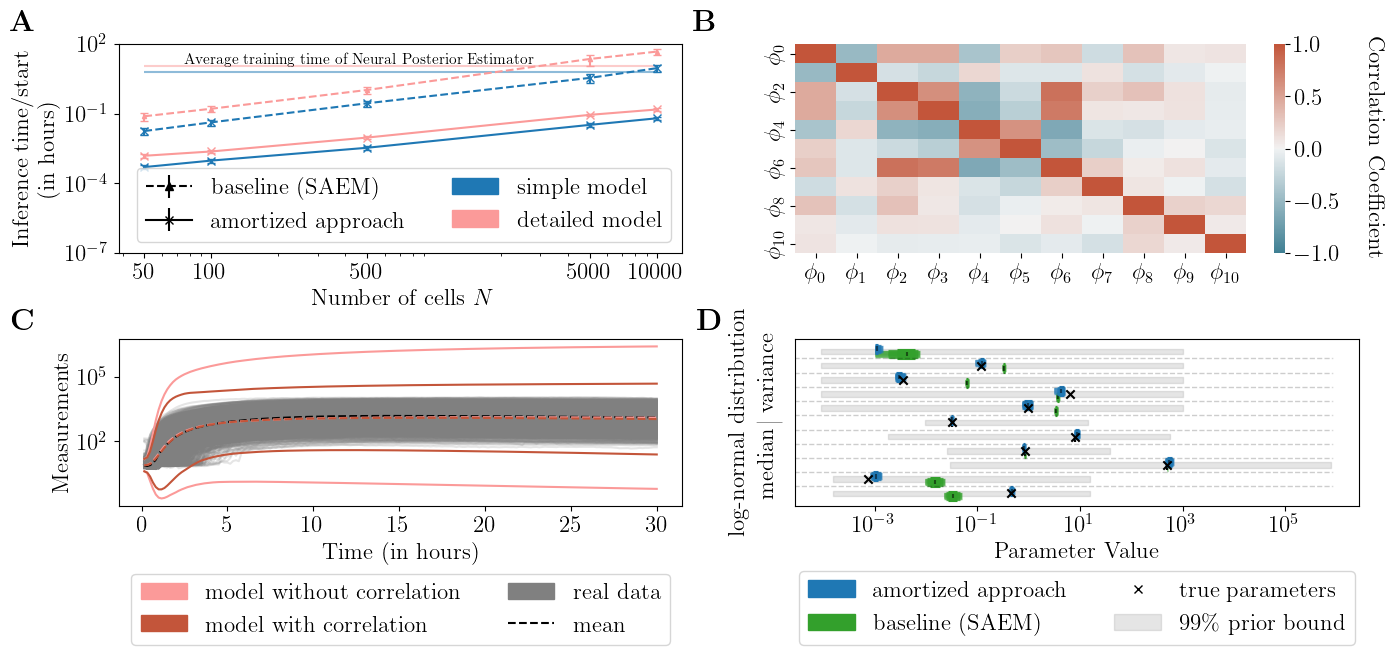

In [15]:
fig_total = plt.figure(figsize=(16,6))
grid = plt.GridSpec(3, 2, figure=fig_total, width_ratios=[1,1], height_ratios=[1, 0.15, 0.8])
ax1 = fig_total.add_subplot(grid[0, 1])
ax2 = fig_total.add_subplot(grid[2, 0])
ax3 = fig_total.add_subplot(grid[0, 0])
ax4 = fig_total.add_subplot(grid[2, 1])


###################### # Correlation Plot
#ax1.set_title('Parameter Correlation in Detailed NLME Model')

corrplot(corr_df, square=False, ax=ax1)
ax1.yaxis.set_label_position("right")
ax1.set_title('')
ax1.set_ylabel('Correlation Coefficient', rotation=270, labelpad=100)

###################### population fit (no corr, corr)
# plot real synthetic data vs estimated data
colors_corr = [colors[4], sns.diverging_palette(220, 20, n=220)[-1]]

t_points = np.linspace(start=1 / 6, stop=30, num=real_single_cell.shape[1], endpoint=True)
for cell in single_real_data:
    ax2.plot(t_points, np.exp(cell), '-', color='grey', alpha=0.2, label='data')

ax2.plot(t_points, np.exp(pop_spread_lower_no_corr.flatten()), '-', color=colors_corr[0])
ax2.plot(t_points, np.exp(pop_spread_upper_no_corr.flatten()), '-', color=colors_corr[0])

ax2.plot(t_points, np.exp(pop_spread_lower_corr.flatten()), '-', color=colors_corr[1])
ax2.plot(t_points, np.exp(pop_spread_upper_corr.flatten()), '-', color=colors_corr[1])


ax2.plot(t_points, np.exp(real_mean), '--', color='black', label='mean')
ax2.plot(t_points, np.exp(np.mean(reproduced_data_diag, axis=0)), '--', color=colors_corr[0],
         label='without correlation')
ax2.plot(t_points, np.exp(np.mean(reproduced_data_cholesky, axis=0)), '--', color=colors_corr[1],
         label='with correlation')

no_corr_patch = mpatches.Patch(color=colors_corr[0], label='model without correlation')
corr_patch = mpatches.Patch(color=colors_corr[1], label='model with correlation')
mean, = plt.plot([], [], '--', color='black', label='mean')
data_label = mpatches.Patch(color='grey', label='real data')
ax2.legend(handles=[no_corr_patch, corr_patch, data_label, mean], ncol=2,
           loc='lower center', bbox_to_anchor=(0.5, -0.9))
ax2.set_yscale('log')
#ax2.set_title('Fitting Correlation in Detailed NLME Model')
ax2.set_xlabel('Time (in hours)')
ax2.set_ylabel('Measurements')

###################### Scalability
#ax3.set_title('Inference Time')

### Time on Synthetic Data
ax3.hlines(6.11, xmin=test_n_cells[0], xmax=test_n_cells[-1], color=colors[0], alpha=0.5)
ax3.hlines(11.74, xmin=test_n_cells[0], xmax=test_n_cells[-1], color=colors[4], alpha=0.5)
ax3.annotate('Average training time of Neural Posterior Estimator', xy=(75, 15), fontsize=11, color='black')

for j, n_samples_opt in enumerate([10, 50, 100, 250]):
    if n_samples_opt != 100: continue
    ax3.errorbar(test_n_cells, np.median(simple_model_time_opt[:, j], axis=-1), np.std(simple_model_time_opt[:, j], axis=-1), 
                 color=colors[0], marker='x', capsize=3)
for j, n_samples_opt in enumerate([10, 50, 100]):
    if n_samples_opt != 100: continue
    ax3.errorbar(test_n_cells, np.median(detailed_model_time_opt[:, j], axis=-1), np.std(detailed_model_time_opt[:, j], axis=-1), 
                 color=colors[4], marker='x', capsize=3)
ax3.errorbar(test_n_cells, simple_model_timing_monolix, simple_model_timing_monolix_std, color=colors[0],
                    marker='x', linestyle='--', capsize=3)
ax3.errorbar(test_n_cells, detailed_model_timing_monolix, detailed_model_timing_monolix_std, color=colors[4],
                    marker='^', linestyle='--', capsize=3, markersize=3)

ax3.set_ylabel('Inference time/start\n(in hours)')
ax3.set_xscale('log')
ax3.set_yscale('log')
ax3.set_xlabel('Number of cells $N$')
ax3.set_xticks(ticks=test_n_cells, labels=test_n_cells) #, rotation=60)
ax3.set_ylim((1e-7,100))

amortized = ax4.errorbar([], [], [], color='black', linestyle= '-', marker='x', capsize=3, label='amortized approach')
baseline = ax4.errorbar([], [], [], color='black', linestyle='--', marker='^', capsize=3, label='baseline (SAEM)')
small_patch = mpatches.Patch(color=colors[0], label='simple model')
large_patch = mpatches.Patch(color=colors[4], label='detailed model')
ax3.legend(handles=[baseline, amortized, small_patch, large_patch, ], ncols=2, loc='lower right')


###################### Uncertainty
#ax4.set_title('Confidence Intervals for Simple NLME Model')

offset = 0.2
# plot boundaries
for i in range(n_opt_param - 1):
    ax4.fill_betweenx([i - offset, i + offset], np.exp(lower_bound[i]), np.exp(upper_bound[i]),
                      color='grey', alpha=0.2)

plot_intervals(transformed_monolix_median,
               transformed_monolix_intervals[0],
               ax=ax4,
               alpha_median=0.5,
               par_names=param_names_plot[:-1],
               levels=[0.2, 0.05, 0.01, 0.99, 0.95, 0.8],
               offset=-offset,
               color=colors[3])
plot_intervals(np.median(transformed_intervals, axis=1),
               transformed_intervals,
               ax=ax4, alpha_median=0.5,
               par_names=param_names_plot[:-1],
               levels=[0.2, 0.05, 0.01, 0.99, 0.95, 0.8],
               offset=offset,
               color=colors[0])

ax4.scatter(transformed_true_params[:-1], np.arange(n_opt_param - 1),
           c='black', marker='x', label='True Parameters', zorder=2)
plot_param_names = [r'$\mathbf{\beta}_{' + f'{i}' + r'}$' for i in range(6)] + [r'$\mathbf{\Psi}_{' + f'{i}{i}' + r'}$' for i in range(5)]
ax4.set_yticks([], [])
ax4.set_xlabel('Parameter Value')
ax4.set_xscale('log')

true_params, = ax4.plot([], [], 'x', color='black', label='true parameters')  # not visible
baseline = mpatches.Patch(color=colors[3], label='baseline (SAEM)')
amortized = mpatches.Patch(color=colors[0], label='amortized approach')
prior_range = mpatches.Patch(color='grey', alpha=0.2, label='99\% prior bound')
ax4.legend(handles=[amortized, baseline, true_params, prior_range], loc='lower center',
           bbox_to_anchor=(0.5, -0.9), ncols=2)

# more comprehensive y labels
plt.text(-0.1, 0.5, 'log-normal distribution', horizontalalignment='center',
     verticalalignment='center', transform=ax4.transAxes, rotation=90, fontsize='small')
plt.text(-0.05, 0.8, 'variance', horizontalalignment='center',
     verticalalignment='center', transform=ax4.transAxes, rotation=90, fontsize='small')
plt.text(-0.05, 0.25, 'median', horizontalalignment='center',
     verticalalignment='center', transform=ax4.transAxes, rotation=90, fontsize='small')
plt.text(-0.07, 0.54, '---', horizontalalignment='left',
     verticalalignment='center', transform=ax4.transAxes)

ax1.text(-0.2, 1.1, '\\bf{B}', horizontalalignment='center', verticalalignment='center',
         transform=ax1.transAxes, fontsize=22)
ax2.text(-0.17, 1.1, '\\bf{C}', horizontalalignment='center', verticalalignment='center',
         transform=ax2.transAxes, fontsize=22)
ax3.text(-0.17, 1.1, '\\bf{A}', horizontalalignment='center', verticalalignment='center',
         transform=ax3.transAxes, fontsize=22)
ax4.text(-0.15, 1.1, '\\bf{D}', horizontalalignment='center', verticalalignment='center',
         transform=ax4.transAxes, fontsize=22)
#plt.savefig('../plots/paper/results_plot2.pdf', format='pdf', bbox_inches='tight',
#            dpi=600)
plt.show()

 # Uncertainty Analysis

In [18]:
param_names = detailed_model.param_names.copy()
pop_param_names = ['median-' + name for name in param_names]
var_param_names = ['var-' + name for name in param_names]
param_names_plot_large = param_names + param_names

n_data = 500
true_sample_params = detailed_model.load_synthetic_parameter(n_data)
result_optimization = read_from_hdf5.read_result(f'../Experiments/synthetic_results_amortized/uncertainty_fröhlich-detailed_cells_{n_data}_samples_100.hdf5')

# compute confidence intervals and save them
profile_list = result_optimization.profile_result.list[0]
profile_indices = [ix for ix, res in enumerate(profile_list) if res]

intervals_large = []
for i_par in range(result_optimization.problem.dim_full):
    if i_par not in profile_indices:
        continue
    xs = profile_list[i_par].x_path[i_par]
    ratios = profile_list[i_par].ratio_path
    lb_01, ub_01 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.99)
    )
    lb_05, ub_05 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.95)
    )
    lb_2, ub_2 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.80)
    )
    if i_par < detailed_model.n_params:
        intervals_large.append((lb_2, lb_05, lb_01, ub_01, ub_05, ub_2))
    else:
        intervals_large.append((np.exp(-ub_2), np.exp(-ub_05), np.exp(-ub_01), np.exp(-lb_01), np.exp(-lb_05), np.exp(-lb_2)))
intervals_large = np.array(intervals_large)

transformed_intervals_large = np.concatenate((np.exp(intervals_large[:detailed_model.n_params]),
                                                intervals_large[detailed_model.n_params:]))
transformed_true_params_large = np.concatenate((np.exp(true_sample_params[:detailed_model.n_params]),
                                          true_sample_params[detailed_model.n_params:]))

lower_bound_large, upper_bound_large = create_boundaries_from_prior(
        prior_mean=detailed_model.prior_mean,
        prior_std=detailed_model.prior_std,
        boundary_width_from_prior=2.58,  # 99% of the prior mass is within 2.58 standard deviations
        covariance_format='diag',
        prior_type='normal'
)

## sde model
from models.froehlich_model_sde import FroehlichModelSDE
model_sde = FroehlichModelSDE(load_best=True)
param_names = model_sde.param_names.copy()
#param_names[2] = 'scale'
pop_param_names = ['median-' + name for name in param_names]
var_param_names = ['var-' + name for name in param_names]
param_names_plot_sde = param_names + param_names

true_sample_params = model_sde.load_synthetic_parameter(n_data)
result_optimization = read_from_hdf5.read_result(f'../Experiments/synthetic_results_amortized/uncertainty_fröhlich-sde_cells_{n_data}_samples_100.hdf5')

# compute confidence intervals and save them
profile_list = result_optimization.profile_result.list[0]
profile_indices = [ix for ix, res in enumerate(profile_list) if res]

intervals_sde = []
for i_par in range(result_optimization.problem.dim_full):
    if i_par not in profile_indices:
        continue
    xs = profile_list[i_par].x_path[i_par]
    ratios = profile_list[i_par].ratio_path
    lb_01, ub_01 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.99)
    )
    lb_05, ub_05 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.95)
    )
    lb_2, ub_2 = profile.calculate_approximate_ci(
        xs=xs, ratios=ratios, confidence_ratio=profile.chi2_quantile_to_ratio(0.80)
    )
    if i_par < model_sde.n_params:
        intervals_sde.append((lb_2, lb_05, lb_01, ub_01, ub_05, ub_2))
    else:
        intervals_sde.append((np.exp(-ub_2), np.exp(-ub_05), np.exp(-ub_01), np.exp(-lb_01), np.exp(-lb_05), np.exp(-lb_2)))
intervals_sde = np.array(intervals_sde)

transformed_intervals_sde = np.concatenate((np.exp(intervals_sde[:model_sde.n_params]),
                                                intervals_sde[model_sde.n_params:]))
transformed_true_params_sde = np.concatenate((np.exp(true_sample_params[:simple_model.n_params]),
                                          true_sample_params[simple_model.n_params:]))

lower_bound_sde, upper_bound_sde = create_boundaries_from_prior(
        prior_mean=model_sde.prior_mean,
        prior_std=model_sde.prior_std,
        boundary_width_from_prior=2.58,  # 99% of the prior mass is within 2.58 standard deviations
        covariance_format='diag',
        prior_type='normal'
)

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/synthetic_results_amortized/uncertainty_fröhlich-detailed_cells_500_samples_100.hdf5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/synthetic_results_amortized/uncertainty_fröhlich-sde_cells_500_samples_100.hdf5.


using 2 layers of MultiConv1D, a  LSTM with 256 units and a dense layer with output dimension 16 as summary network
using a 7-layer cINN as inference network with 3 layers of design spline
prior mean: [-3. -3. -1.  5.  0.  0.  0. -1.]
prior covariance diagonal: [5. 5. 5. 5. 5. 2. 5. 2.]
Using the model SDEFroehlichModel


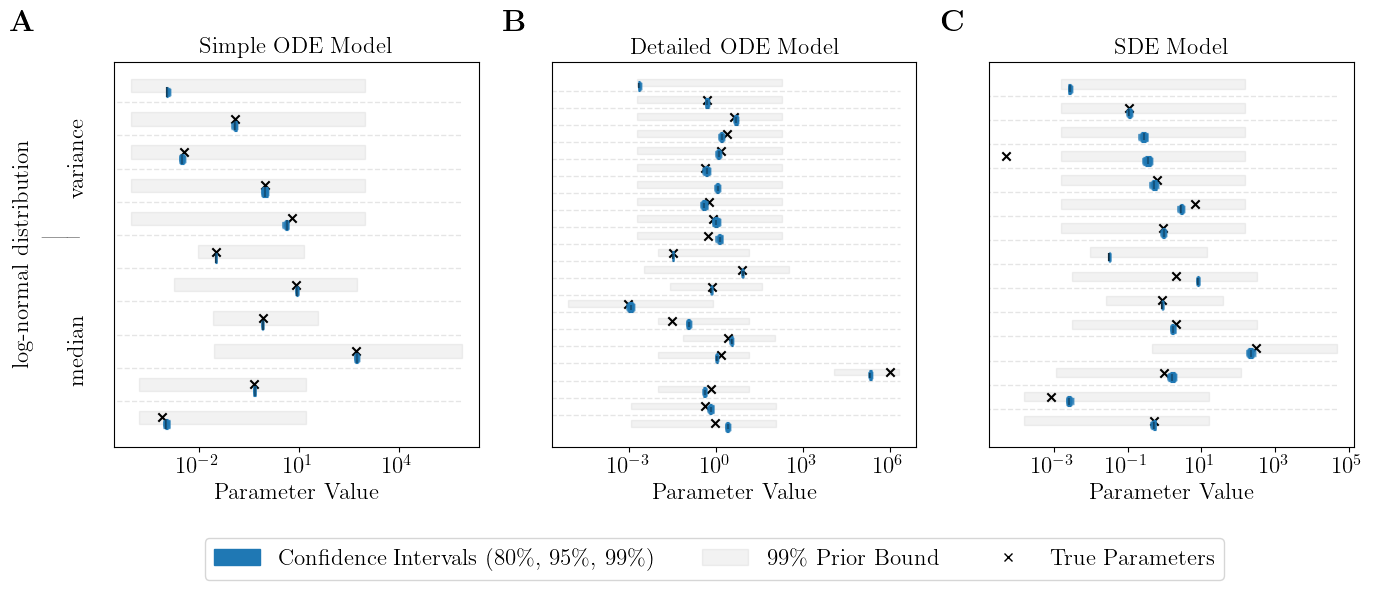

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))
ax[0].set_title('Simple ODE Model')

offset = 0.2

# plot boundaries
for i in range(simple_model.n_params * 2 - 1):
    ax[0].fill_betweenx([i - offset, i + offset], np.exp(lower_bound[i]), np.exp(upper_bound[i]),
                      color='grey', alpha=0.1)

rearange_index = [1,0,2,3,4,5,7,6,8,9,10] # to avoid overlapping of labels
plot_intervals(np.median(transformed_intervals, axis=1)[rearange_index],
               transformed_intervals[rearange_index],
               ax=ax[0],
               alpha_median=0.3,
               par_names=np.array(param_names_plot[:-1])[rearange_index],
               levels=[0.2, 0.05, 0.01, 0.99, 0.95, 0.8],
               offset=-offset,
               color=colors[0])

ax[0].scatter(transformed_true_params[:-1][rearange_index], np.arange(simple_model.n_params * 2 - 1),
           c='black', marker='x', label='True Parameters')
ax[0].set_yticks([],[])
ax[0].set_xlabel('Parameter Value')
ax[0].set_xscale('log')

ax[1].set_title('Detailed ODE Model')
for i in range(detailed_model.n_params * 2 - 1):
    ax[1].fill_betweenx([i - offset, i + offset], np.exp(lower_bound_large[i]), np.exp(upper_bound_large[i]),
                      color='grey', alpha=0.1)
plot_intervals(np.median(transformed_intervals_large, axis=1),
               transformed_intervals_large,
               ax=ax[1],
               alpha_median=0.3,
               par_names=param_names_plot_large[:-1],
               levels=[0.2, 0.05, 0.01, 0.99, 0.95, 0.8],
               offset=-offset,
               color=colors[0])


ax[1].scatter(transformed_true_params_large[:-1], np.arange(detailed_model.n_params * 2 - 1),
           c='black', marker='x', label='True Parameters')
ax[1].set_yticks([],[])
ax[1].set_xlabel('Parameter Value')
ax[1].set_xscale('log')


ax[2].set_title('SDE Model')
for i in range(model_sde.n_params * 2 - 1):
    ax[2].fill_betweenx([i - offset, i + offset], np.exp(lower_bound_sde[i]), np.exp(upper_bound_sde[i]),
                      color='grey', alpha=0.1)
plot_intervals(np.median(transformed_intervals_sde, axis=1),
               transformed_intervals_sde,
               ax=ax[2],
               alpha_median=0.3,
               par_names=param_names_plot_sde[:-1],
               levels=[0.2, 0.05, 0.01, 0.99, 0.95, 0.8],
               offset=-offset,
               color=colors[0])

ax[2].scatter(transformed_true_params_sde[:-1], np.arange(model_sde.n_params * 2 - 1),
           c='black', marker='x', label='True Parameters')
ax[2].set_yticks([],[])
ax[2].set_xlabel('Parameter Value')
ax[2].set_xscale('log')


true_params, = ax[0].plot([], [], 'x', color='black', label='True Parameters')  # not visible
amortized = mpatches.Patch(color=colors[0], label='Confidence Intervals (80\%, 95\%, 99\%)')
prior_range = mpatches.Patch(color='grey', alpha=0.1, label='99\% Prior Bound')

lgd = fig.legend(handles=[amortized, prior_range, true_params],
            loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.18))

# more comprehensive y labels
plt.text(-0.25, 0.5, 'log-normal distribution', horizontalalignment='center',
     verticalalignment='center', transform=ax[0].transAxes, rotation=90, fontsize='small')
plt.text(-0.1, 0.75, 'variance', horizontalalignment='center',
     verticalalignment='center', transform=ax[0].transAxes, rotation=90, fontsize='small')
plt.text(-0.1, 0.25, 'median', horizontalalignment='center',
     verticalalignment='center', transform=ax[0].transAxes, rotation=90, fontsize='small')
plt.text(-0.2, 0.56, '-----', horizontalalignment='left',
     verticalalignment='center', transform=ax[0].transAxes)


ax[0].text(-0.25, 1.1, '\\bf{A}', horizontalalignment='center', verticalalignment='center',
           transform=ax[0].transAxes, fontsize=22)
ax[1].text(-0.1, 1.1, '\\bf{B}', horizontalalignment='center', verticalalignment='center',
           transform=ax[1].transAxes, fontsize=22)
ax[2].text(-0.1, 1.1, '\\bf{C}', horizontalalignment='center', verticalalignment='center',
           transform=ax[2].transAxes, fontsize=22)

#plt.savefig('plots/uncertainty_cell_models.pdf', format='pdf', pad_inches=1,
#            bbox_inches='tight', bbox_extra_artists=(lgd,), dpi=600)
plt.show()

# Analyze SDE model

In [20]:
obs_data = sde_model.load_data(load_egfp=True, load_d2egfp=False)
data = obs_data[5, :][np.newaxis, :]
param_samples = sde_model.draw_posterior_samples(data=data, n_samples=1000)

syn_sim = simulator_sde(param_samples)
# compute mean and 95% credible region
syn_median = np.median(syn_sim, axis=0)
syn_perc = np.percentile(syn_sim.reshape(syn_sim.shape[0], 180), (5, 95), axis=0)

# compute simulations from median made only by model
param_median = np.median(param_samples, axis=0)[np.newaxis]
param_samples_median = np.repeat(param_median, 1000, axis=0)
simulation_median = simulator_sde(param_samples_median)

t_points = np.linspace(start=1 / 6, stop=30, num=180, endpoint=True)

In [24]:
cov_format = 'cholesky'
obj_fun_amortized = ObjectiveFunctionNLME(model_name=simple_model.name,
                                          prior_mean=simple_model.prior_mean,
                                          prior_std=simple_model.prior_std,
                                          covariance_format=cov_format)

result_small = read_from_hdf5.read_result(f'../Experiments/multi-experiment/fröhlich-simple_{cov_format}.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_small.problem.x_names) if 'd2eGFP' not in name]
result_small = result_small.optimize_result.x[0][param_idx_egfp]
estimated_beta, estimated_psi_inv, _, _ = obj_fun_amortized.get_params(result_small)
estimated_psi = np.linalg.inv(estimated_psi_inv)

obj_fun_amortized_sde = ObjectiveFunctionNLME(model_name=sde_model.name,
                                          prior_mean=sde_model.prior_mean,
                                          prior_std=sde_model.prior_std,
                                          covariance_format=cov_format)
result_sde = read_from_hdf5.read_result(f'../Experiments/multi-experiment/fröhlich-sde_{cov_format}.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(result_sde.problem.x_names) if 'd2eGFP' not in name]
result_sde = result_sde.optimize_result.x[0][param_idx_egfp]
estimated_beta_sde, estimated_psi_inv, _, _ = obj_fun_amortized_sde.get_params(result_sde)
estimated_psi_sde = np.linalg.inv(estimated_psi_inv)

This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/multi-experiment/fröhlich-simple_cholesky2.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Experiments/multi-experiment/fröhlich-simple_cholesky2.hdf5.
This problem is not to be used without a separately created objective.
INFO:pypesto.store.read_from_hdf5:WARNING: You are loading a problem.
This problem is not to be used without a separately created objective.
Loading the profiling result failed. It is highly likely that no profiling result exists within ../Experiments/multi-experiment/fröhlich-sde_cholesky2.hdf5.
Loading the sampling result failed. It is highly likely that no sampling result exists within ../Expe

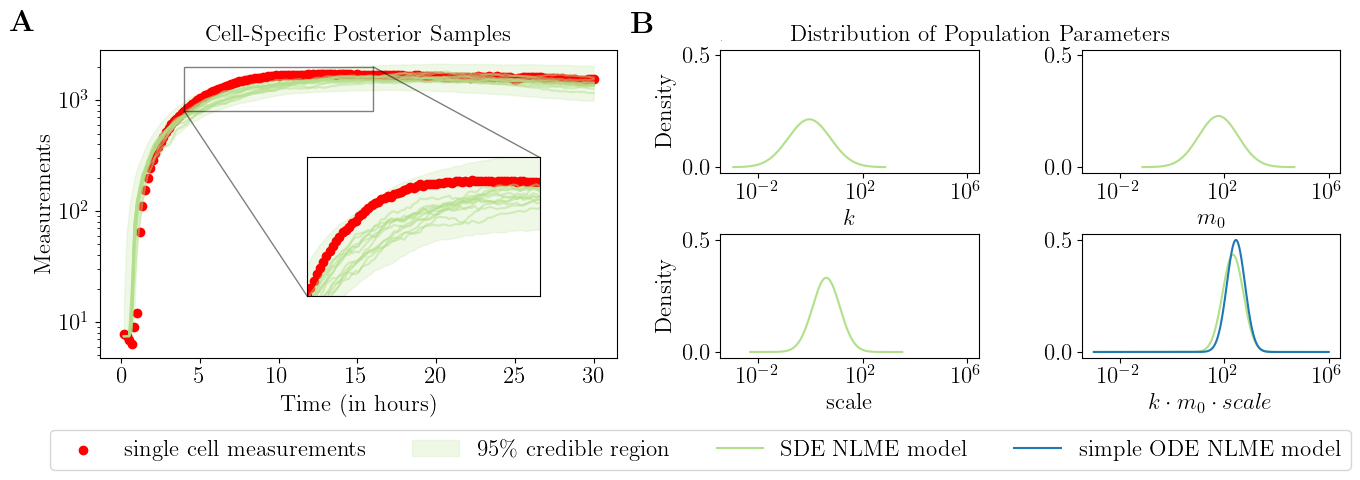

In [28]:
fig = plt.figure(figsize=(16,4)) #, layout="tight", )
grid = plt.GridSpec(2, 3, figure=fig, wspace=0.3, hspace=0.5, width_ratios=[1,0.5,0.5])
axis_joint = fig.add_subplot(grid[1, 2])
axis_fit = fig.add_subplot(grid[:2, 0])
zax = axis_fit.inset_axes([0.4, 0.2, 0.45, 0.45])

axis_sde1 = fig.add_subplot(grid[0, 1], sharex=axis_joint, sharey=axis_joint)
axis_sde2 = fig.add_subplot(grid[0, 2], sharex=axis_sde1, sharey=axis_sde1)
axis_sde3 = fig.add_subplot(grid[1, 1], sharex=axis_sde2, sharey=axis_sde2)


region = axis_fit.fill_between(t_points, np.exp(syn_perc[0, :]), np.exp(syn_perc[1, :]),
                               color=colors[2], alpha=0.2, label=f'95\% credible region')
zax.fill_between(t_points, np.exp(syn_perc[0, :]), np.exp(syn_perc[1, :]),
                 color=colors[2], alpha=0.2, label=f'95\% credible region')

for sim_i, sim in enumerate(simulation_median):
    axis_fit.plot(t_points, np.exp(sim), alpha=0.5, c=colors[2])
    zax.plot(t_points, np.exp(sim), alpha=0.5, c=colors[2])
    if sim_i > 10:
        break
axis_fit.plot([], [], c='black', label=f'median')
measurements = axis_fit.scatter(t_points, np.exp(data.flatten()), c='red', marker='o', label=f'single cell measurements')
zax.scatter(t_points, np.exp(data.flatten()), c='red', marker='o')

zax.set_yscale('log')
zax.set_xlim(4,16)
zax.set_ylim(8e2,2e3)
zax.set_xticks([], labels=[])
zax.set_yticks([], labels=[], minor=True)
zax.set_yticks([])
axis_fit.indicate_inset_zoom(zax, edgecolor="black")

axis_fit.set_xlabel('Time (in hours)')
axis_fit.set_ylabel('Measurements')
axis_fit.set_yscale('log')
axis_fit.set_title('Cell-Specific Posterior Samples')


index_params = [2,3,4]
p_names = ['$k$', '$m_0$', '$\\textrm{scale}$']
for a_i, ax in enumerate([axis_sde1, axis_sde2, axis_sde3]):
    xmax = estimated_beta_sde[index_params[a_i]] + 3* sde_model.prior_std[index_params[a_i]]
    xmin = estimated_beta_sde[index_params[a_i]] - 3* sde_model.prior_std[index_params[a_i]]
    x = np.linspace(xmin, xmax, 1000)

    # Create a log-normal distribution with the given parameters
    norm_distr = norm(loc=estimated_beta_sde[index_params[a_i]],
                      scale=np.sqrt(estimated_psi_sde.diagonal()[index_params[a_i]]))
    ax.plot(np.exp(x), norm_distr.pdf(x), color=colors[2])
    ax.set_xlabel(p_names[a_i])
    ax.set_xscale('log')

joint_variance = estimated_psi_sde.diagonal()[2:5].sum()+2*estimated_psi_sde[2,3]+2*estimated_psi_sde[2,4]+2*estimated_psi_sde[3,4]
x = np.linspace(np.log(1e-3), np.log(1e6), 10000)

norm_distr_sde = norm(loc=estimated_beta_sde[2:5].sum(), scale=np.sqrt(joint_variance))
sde, = axis_joint.plot(np.exp(x), norm_distr_sde.pdf(x), color=colors[2], label='SDE NLME model')

norm_distr_ode = norm(loc=estimated_beta[2], scale=np.sqrt(estimated_psi.diagonal()[2]))
ode, = axis_joint.plot(np.exp(x), norm_distr_ode.pdf(x), color=colors[0], label='simple ODE NLME model')

axis_joint.set_xscale('log')
axis_joint.set_xlabel('$k\cdot m_0 \cdot scale$')
axis_sde1.set_ylabel('Density')
#axis_sde2.set_ylabel('Density')
axis_sde3.set_ylabel('Density')
#axis_joint.set_ylabel('Density')
axis_joint.set_xticks([1e-2, 1e2, 1e6])

lgd = fig.legend(handles=[measurements, region, sde, ode],
            loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.2))
axis_sde1.set_title('{\\tiny .}\qquad\quad Distribution of Population Parameters', loc='left')

axis_fit.text(-0.15, 1.085, '\\bf{A}', horizontalalignment='center', verticalalignment='center',
              transform=axis_fit.transAxes, fontsize=22)
axis_sde1.text(-0.3, 1.2, '\\bf{B}', horizontalalignment='center', verticalalignment='center',
               transform=axis_sde1.transAxes, fontsize=22)

#plt.savefig('../plots/paper/sde_analysis.pdf', format='pdf', bbox_inches='tight', pad_inches=0.26,
#             bbox_extra_artists=(lgd,), dpi=600)
plt.show()

## Compare SDE and ODE model on synthetic data

In [ ]:
n_data = 500
sde_obs_data = sde_model.load_data(n_data=n_data, synthetic=True)

obj_fun_amortized = ObjectiveFunctionNLME(model_name=simple_model.name,
                                          prior_mean=simple_model.prior_mean,
                                          prior_std=simple_model.prior_std,
                                          covariance_format='diag')
obj_fun_amortized_sde = ObjectiveFunctionNLME(model_name=sde_model.name,
                                          prior_mean=sde_model.prior_mean,
                                          prior_std=sde_model.prior_std,
                                          covariance_format='diag')

simple_result_sde = read_from_hdf5.read_result(f'../Experiments/sde_comparison/fröhlich-simple_{n_data}_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(simple_result_sde.problem.x_names) if 'd2eGFP' not in name]
simple_result_sde = simple_result_sde.optimize_result.x[0][param_idx_egfp]

estimated_beta, estimated_psi_inv, _, _ = obj_fun_amortized.get_params(simple_result_sde)
estimated_psi = np.linalg.inv(estimated_psi_inv)

sde_result_sde = read_from_hdf5.read_result(f'../Experiments/sde_comparison/fröhlich-sde_{n_data}_diag.hdf5')
param_idx_egfp = [i_n for i_n, name in enumerate(sde_result_sde.problem.x_names) if 'd2eGFP' not in name]
sde_result_sde = sde_result_sde.optimize_result.x[0][param_idx_egfp]

estimated_beta_sde, estimated_psi_inv, _, _ = obj_fun_amortized_sde.get_params(sde_result_sde)
estimated_psi_sde = np.linalg.inv(estimated_psi_inv)

np.random.seed(42)
n_trajectories = len(sde_obs_data)
reproduced_param_simple = np.random.multivariate_normal(estimated_beta,
                                                     estimated_psi,
                                                     size=n_trajectories*10)
reproduced_param_sde = np.random.multivariate_normal(estimated_beta_sde,
                                                        estimated_psi_sde,
                                                        size=n_trajectories*10)

reproduced_data_simple = simulator_simple(reproduced_param_simple, with_noise=False)
reproduced_data_sde = simulator_sde(reproduced_param_sde, with_noise=False)

real_mean = np.mean(sde_obs_data, axis=0)
real_var = np.var(sde_obs_data, axis=0)
dif_simple = np.mean(reproduced_data_simple, axis=0) - real_mean
dif_var_simple = np.var(reproduced_data_simple, axis=0) - real_var
std_simple = np.std(reproduced_data_simple, axis=0)

dif_sde = np.mean(reproduced_data_sde, axis=0) - real_mean
dif_var_sde = np.var(reproduced_data_sde, axis=0) - real_var
std_sde = np.std(reproduced_data_sde, axis=0)

t_value_05 = abs(t_dist.ppf(0.05 / reproduced_data_simple.shape[1], df=reproduced_data_simple.shape[0] - 1))

confidence_band_upper = dif_simple + t_value_05 * std_simple / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_lower = dif_simple - t_value_05 * std_simple / np.sqrt(reproduced_data_simple.shape[0])
confidence_band_upper_sde = dif_sde + t_value_05 * std_sde / np.sqrt(reproduced_data_sde.shape[0])
confidence_band_lower_sde = dif_sde - t_value_05 * std_sde / np.sqrt(reproduced_data_sde.shape[0])

In [0]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16, 5), layout="tight")
# plot real synthetic data vs estimated data
t_points = np.linspace(start=1 / 6, stop=30, num=single_real_data.shape[1], endpoint=True)

ax[0].set_title('Single-Cell Data')
for i, cell in enumerate(sde_obs_data):
    if i > 100: break
    ax[0].plot(t_points, np.exp(cell.flatten()), color='grey', alpha=0.5)
ax[0].set_xlabel('Time (in hours)')
ax[0].set_ylabel('Measurements')
ax[0].set_yscale('log')

ax[1].fill_between(t_points, confidence_band_upper.flatten(), confidence_band_lower.flatten(),
                         color=colors[0], alpha=0.5, label='ODE')
ax[1].plot(t_points, dif_simple, color=colors[0])
ax[1].plot(t_points, np.zeros(t_points.size), color='black', linestyle='--', alpha=0.25)
ax[1].fill_between(t_points, confidence_band_upper_sde.flatten(), confidence_band_lower_sde.flatten(),
                         color=colors[2], alpha=0.5, label='SDE')
ax[1].plot(t_points, dif_sde, color=colors[2])

ax[2].plot(t_points, dif_var_simple, color=colors[2])
ax[2].plot(t_points, np.zeros(t_points.size), color='black', linestyle='--', alpha=0.25)
ax[2].plot(t_points, dif_var_sde, color=colors[1])

ax[1].set_title('Estimated Population Mean')
ax[2].set_title('Estimated Population Variance')
ax[1].set_ylabel('Difference to sample mean')
ax[2].set_ylabel('Difference to sample variance')
ax[1].set_xlabel('Time (in hours)')
ax[2].set_xlabel('Time (in hours)')

real_measurement = mpatches.Patch(color='grey', label='Single-cell data')
ode_patch = mpatches.Patch(color=colors[0], label='Simple ODE model')
sde_patch = mpatches.Patch(color=colors[2], label='SDE model')
lgd = fig.legend(handles=[real_measurement, ode_patch, sde_patch],
            loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.1))

ax[0].text(-0.18, 1.1, '\\bf{A}', horizontalalignment='center', verticalalignment='center',
           transform=ax[0].transAxes, fontsize=22)
ax[1].text(-0.25, 1.1, '\\bf{B}', horizontalalignment='center', verticalalignment='center',
           transform=ax[1].transAxes, fontsize=22)
ax[2].text(-0.25, 1.1, '\\bf{C}', horizontalalignment='center', verticalalignment='center',
           transform=ax[2].transAxes, fontsize=22)

#plt.savefig('plots/sde_vs_ode.pdf', format='pdf', bbox_inches='tight',  pad_inches=0.2,
#            bbox_extra_artists=(lgd,), dpi=600)

plt.show()